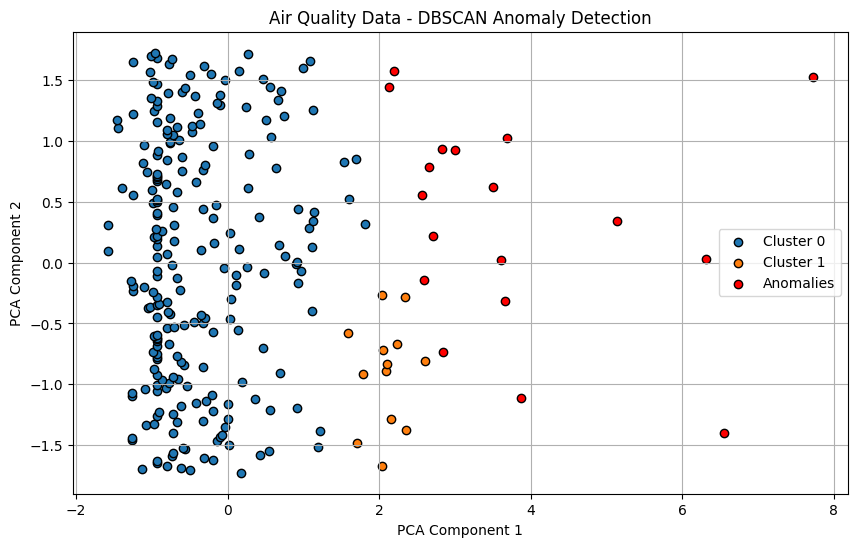

Anomaly Percentage: 6.92%
High anomaly rate detected! Further investigation needed.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

df = pd.read_csv("air_quality.csv")
df = df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_pca)
anomalies = labels == -1
unique_labels = set(labels)
plt.figure(figsize=(10, 6))
for label in unique_labels:
    mask = labels == label
    if label == -1:
        plt.scatter(data_pca[mask, 0], data_pca[mask, 1], c='red', label='Anomalies', edgecolors='k')
    else:
        plt.scatter(data_pca[mask, 0], data_pca[mask, 1], edgecolors='k', label=f'Cluster {label}')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Air Quality Data - DBSCAN Anomaly Detection")
plt.legend()
plt.grid()
plt.show()
anomaly_percentage = (np.sum(anomalies) / len(df)) * 100
print(f"Anomaly Percentage: {anomaly_percentage:.2f}%")
if anomaly_percentage > 5:
    print("High anomaly rate detected! Further investigation needed.")
else:
    print("Data looks mostly normal.")